#Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 10.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import yfinance as yf

In [4]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [27]:

#ticker = yf.Ticker("TSLA")
#hist = ticker.history(period="max")
#df = yf.download(ticker, start="2017-01-01", end="2017-04-30")
df = pd.read_csv('BTC-USD.csv')

In [8]:
#read_csv function from pandas

In [29]:
#df.index for yfinance
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2716,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570313,37296.570313,21849073843
2717,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093
2718,2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159
2719,2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2721 non-null   object 
 1   Open       2721 non-null   float64
 2   High       2721 non-null   float64
 3   Low        2721 non-null   float64
 4   Close      2721 non-null   float64
 5   Adj Close  2721 non-null   float64
 6   Volume     2721 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.9+ KB


In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03
mean,11390.906697,11696.111340,11052.559202,11403.046117,11403.046117,1.473416e+10
std,16149.940449,16581.705921,15650.127779,16152.593302,16152.593302,2.000086e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,607.005005,609.734985,604.606995,606.973022,606.973022,8.026580e+07
50%,6330.770020,6446.259766,6236.470215,6329.950195,6329.950195,5.127130e+09
75%,10535.492188,10798.729492,10234.576172,10549.329102,10549.329102,2.460973e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [32]:
px.area(df, x="Date", y="Close")

In [33]:
px.line(df, x="Date", y="Close")

In [34]:
px.area(df, x="Date", y="Volume")

In [35]:
px.bar(df, y='Volume')

In [36]:
px.box(df, y="Close")

# Understanding Facebook Prophet

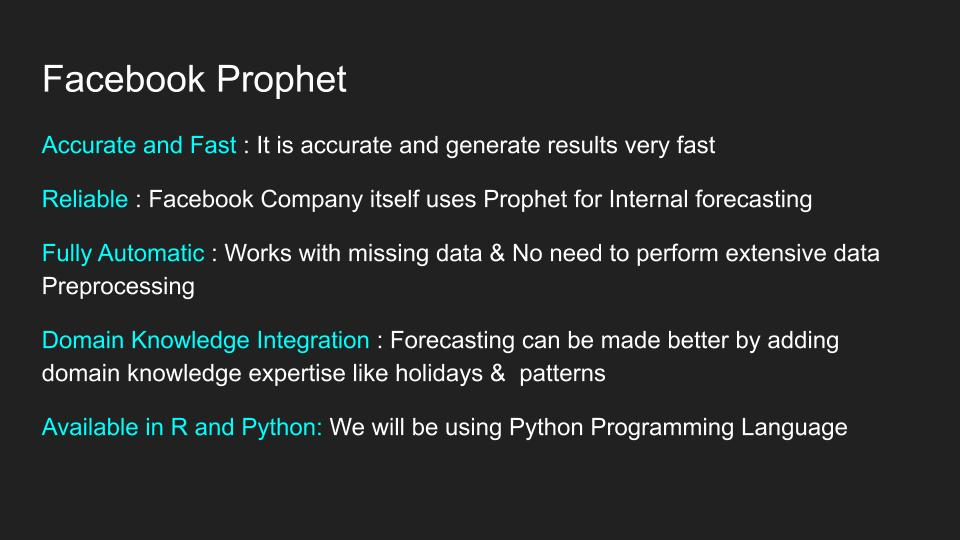

## Data Preperation

In [37]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2716,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570313,37296.570313,21849073843
2717,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093
2718,2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,39214.218750,26545599159
2719,2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,39105.148438,17467554129


In [38]:
columns=['Date','Close']
ndf= pd.DataFrame(df, columns=columns)

In [39]:
ndf

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2716,2022-02-23,37296.570313
2717,2022-02-24,38332.609375
2718,2022-02-25,39214.218750
2719,2022-02-26,39105.148438


In [40]:
  prophet_df= ndf.rename(columns={'Date':'ds','Close':'y'})

In [41]:
prophet_df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2716,2022-02-23,37296.570313
2717,2022-02-24,38332.609375
2718,2022-02-25,39214.218750
2719,2022-02-26,39105.148438


## Creating Facebook Prophet Model

In [42]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [43]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-11.306543,-8689.771058,5708.105721,-11.306543,-11.306543,-1415.902085,-1415.902085,-1415.902085,23.015437,23.015437,23.015437,-1438.917522,-1438.917522,-1438.917522,0.0,0.0,0.0,-1427.208627
1,2014-09-18,-10.329030,-7916.020566,5503.002294,-10.329030,-10.329030,-1529.297842,-1529.297842,-1529.297842,-27.661498,-27.661498,-27.661498,-1501.636345,-1501.636345,-1501.636345,0.0,0.0,0.0,-1539.626872
2,2014-09-19,-9.351517,-8822.794694,5333.323486,-9.351517,-9.351517,-1567.689234,-1567.689234,-1567.689234,-8.952974,-8.952974,-8.952974,-1558.736261,-1558.736261,-1558.736261,0.0,0.0,0.0,-1577.040752
3,2014-09-20,-8.374005,-8257.691358,5407.848309,-8.374005,-8.374005,-1610.358751,-1610.358751,-1610.358751,-1.109754,-1.109754,-1.109754,-1609.248997,-1609.248997,-1609.248997,0.0,0.0,0.0,-1618.732756
4,2014-09-21,-7.396492,-8919.668365,5398.817329,-7.396492,-7.396492,-1673.585361,-1673.585361,-1673.585361,-21.327209,-21.327209,-21.327209,-1652.258152,-1652.258152,-1652.258152,0.0,0.0,0.0,-1680.981854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,2022-03-25,61078.721399,55833.085892,71153.841332,61067.305598,61078.721399,2666.727936,2666.727936,2666.727936,-8.952974,-8.952974,-8.952974,2675.680910,2675.680910,2675.680910,0.0,0.0,0.0,63745.449335
2747,2022-03-26,61153.382173,56557.132215,71357.894137,61140.036165,61153.382173,2658.712600,2658.712600,2658.712600,-1.109754,-1.109754,-1.109754,2659.822353,2659.822353,2659.822353,0.0,0.0,0.0,63812.094773
2748,2022-03-27,61228.042948,56658.477092,71057.285905,61211.887096,61228.102504,2619.028540,2619.028540,2619.028540,-21.327209,-21.327209,-21.327209,2640.355749,2640.355749,2640.355749,0.0,0.0,0.0,63847.071487
2749,2022-03-28,61302.703722,57283.706124,70972.537218,61283.641788,61303.034813,2652.015353,2652.015353,2652.015353,34.232049,34.232049,34.232049,2617.783304,2617.783304,2617.783304,0.0,0.0,0.0,63954.719075


In [45]:
px.line(forecast, x='ds',y='yhat')

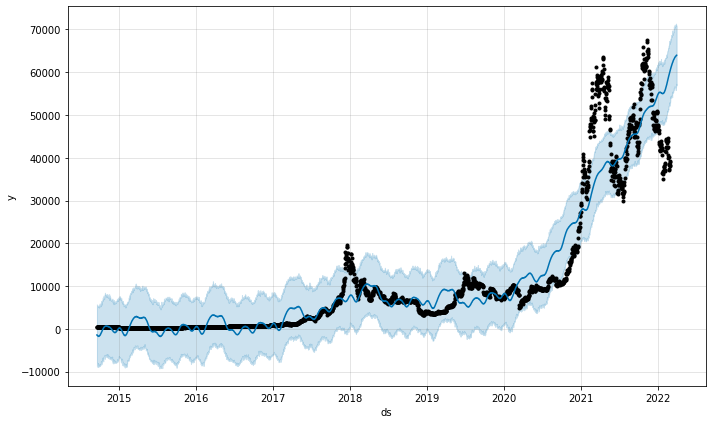

In [46]:
figure= m.plot(forecast, xlabel='ds', ylabel='y')

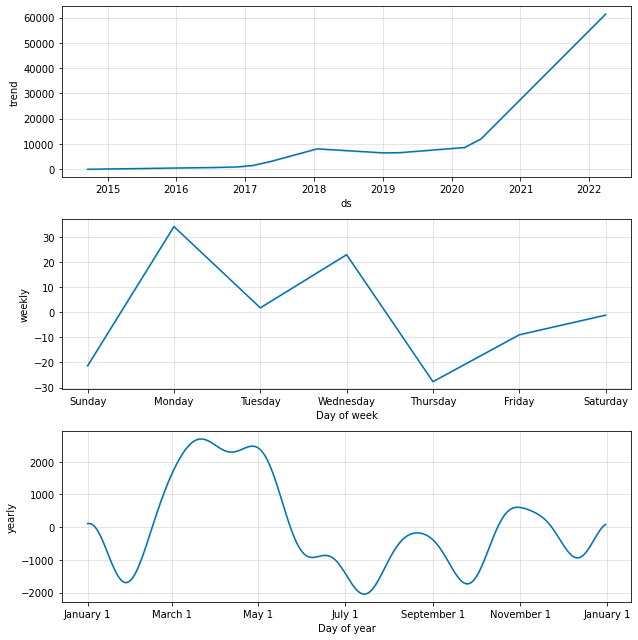

In [47]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>